In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("raytune_results.csv")
df.head()

,Unnamed: 0,train_mean_loss,train_accuracy,train_f1_score,val_mean_loss,val_accuracy,val_f1_score,val_confusion_matrix,timestamp,checkpoint_dir_name,...,hostname,node_ip,time_since_restore,iterations_since_restore,config/max_seconds_length,config/dropout,config/coraa_filter_func,config/learning_rate,config/model_architecture,logdir
0,0,0.695166,0.533088,0.072993,0.700997,0.439560,0.000000,"[[40, 0], [51, 0]]",1725542927,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,33.199229,30,11,0.701110,filter0,0.019624,CnnMFCC,26aff595
1,1,3.889641,0.457275,0.503171,0.691893,0.486111,0.654206,"[[0, 74], [0, 70]]",1725542952,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,21.749569,15,7,0.915081,filter2,0.000067,CnnSpectrogram,265308cf
2,2,0.297813,0.857971,0.848297,1.326565,0.521739,0.525862,"[[59, 53], [57, 61]]",1725543052,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,96.583217,30,19,0.304782,filter1,0.003369,CnnSpectrogram_v2,671a3d97
3,3,1.025463,0.519630,0.455497,0.737933,0.493056,0.075949,"[[68, 6], [67, 3]]",1725543060,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,5.222292,5,3,0.457701,filter2,0.000010,CnnSpectrogram,80480a1f
4,4,0.919707,0.475751,0.428212,0.716562,0.520833,0.330097,"[[58, 16], [53, 17]]",1725543069,NaN,...,DESKTOP-GF0BL1G,172.18.58.174,6.175088,5,5,0.312639,filter2,0.000016,CnnSpectrogram,138b08bf


(0.0, 1.0)

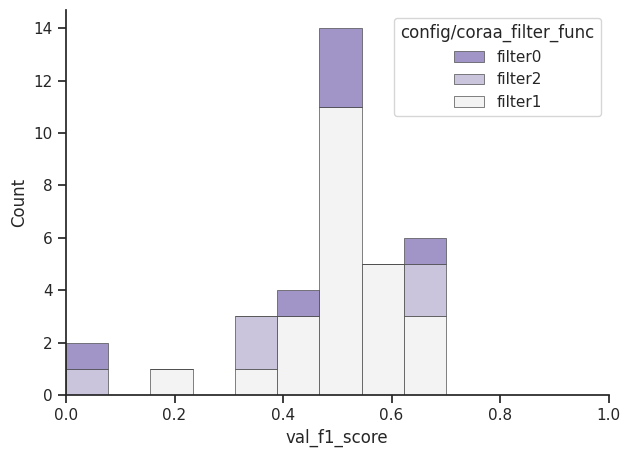

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="val_f1_score", hue="config/coraa_filter_func",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.xlim(0,1)

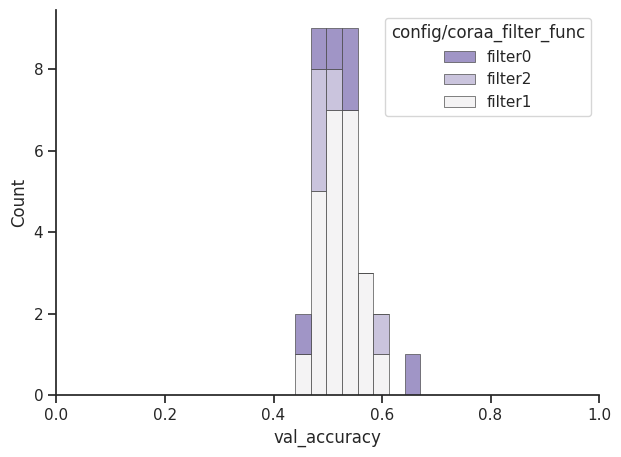

In [4]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="val_accuracy", hue="config/coraa_filter_func",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.xlim(0,1)
plt.show()

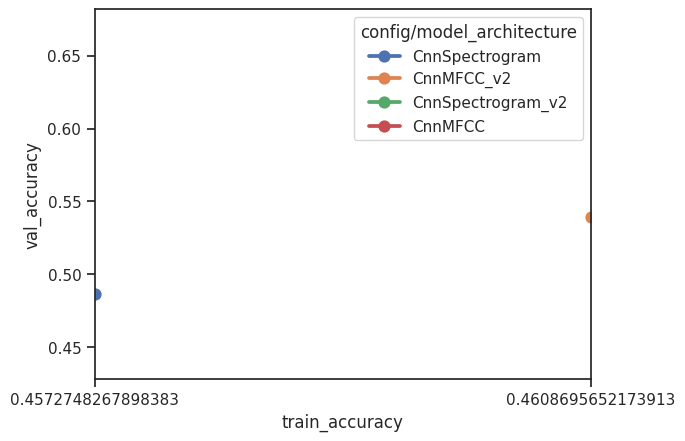

In [5]:


sns.pointplot(
    df,
    x="train_accuracy", hue="config/model_architecture",
    y="val_accuracy",
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.xlim(0,1)
plt.show()

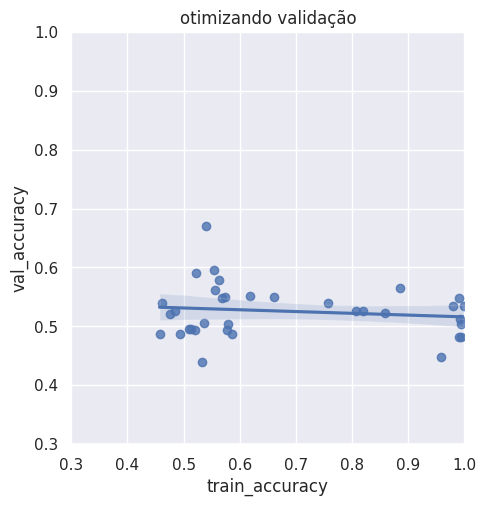

In [6]:
import seaborn as sns
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="train_accuracy", y="val_accuracy",
    height=5
)
g.set(title="otimizando validação", xlim=(0.3,1), ylim=(0.3,1))

# Use more informative axis labels than are provided by default

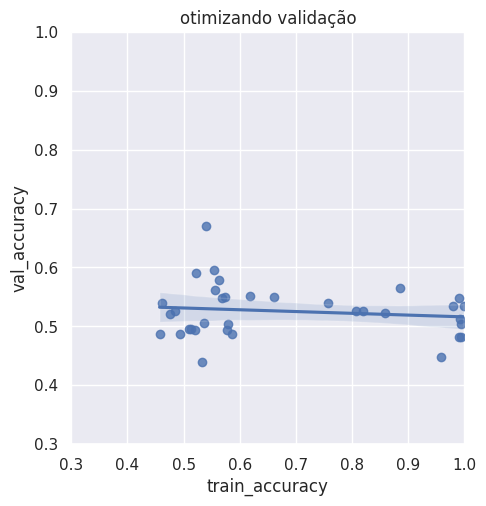

In [7]:
import seaborn as sns
sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="train_accuracy", y="val_accuracy",
    height=5
)
g.set(title="otimizando validação", xlim=(0.3,1), ylim=(0.3,1))

# Use more informative axis labels than are provided by default

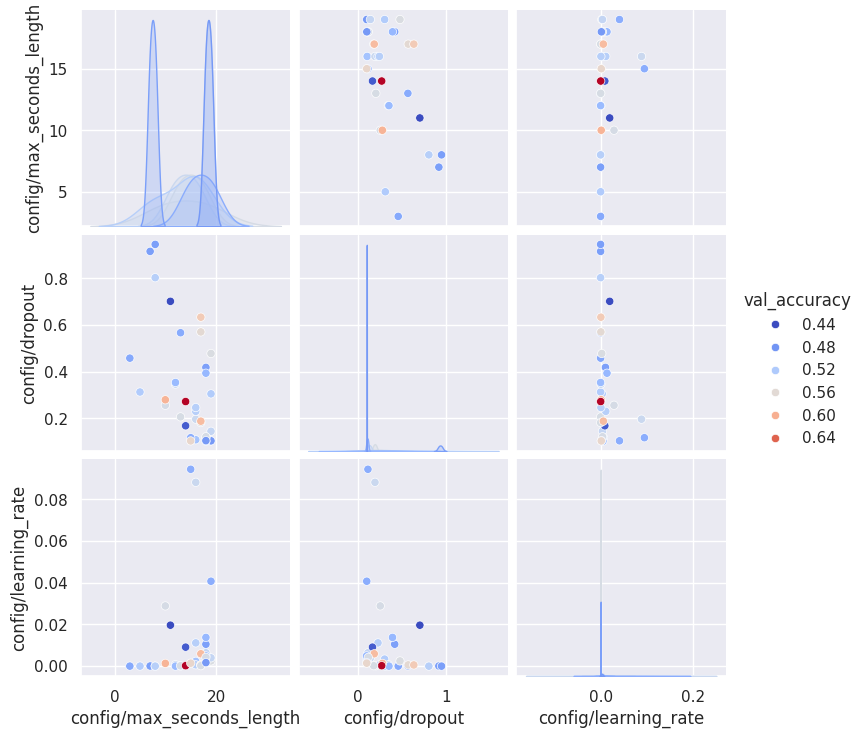

In [8]:
sns.pairplot(df[['val_accuracy', 'config/max_seconds_length', 'config/dropout','config/coraa_filter_func','config/learning_rate','config/model_architecture']], hue='val_accuracy', palette='coolwarm', diag_kind='kde')
plt.show()


In [9]:
df_regularization = df.drop(["Unnamed: 0","config/max_seconds_length", "config/coraa_filter_func", "config/learning_rate", "config/model_architecture", "training_iteration","train_mean_loss", "train_f1_score", "val_mean_loss", "val_f1_score", "val_confusion_matrix", "checkpoint_dir_name", "timestamp", "done", "trial_id", "date", "time_this_iter_s", "time_total_s", "pid", "hostname", "node_ip", "time_since_restore", "iterations_since_restore", "logdir"], axis=1).reset_index(drop=True)
df_regularization

,train_accuracy,val_accuracy,config/dropout
0,0.533088,0.439560,0.701110
1,0.457275,0.486111,0.915081
2,0.857971,0.521739,0.304782
3,0.519630,0.493056,0.457701
4,0.475751,0.520833,0.312639
5,0.577206,0.494505,0.566533
6,0.494226,0.486111,0.944984
7,0.757971,0.539130,0.346401
8,0.536765,0.505495,0.353350
9,0.484058,0.526087,0.802399


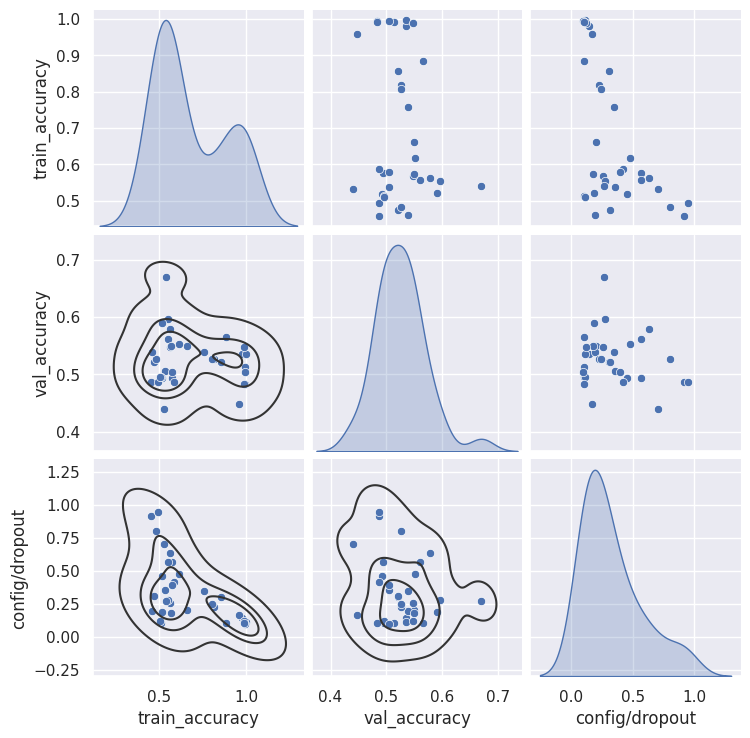

In [10]:
log_columns = ["config/learning_rate"]
pp = sns.pairplot(df_regularization, diag_kind="kde")
pp.map_lower(sns.kdeplot, levels=4, color=".2")
for ax in pp.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")

KeyError: 'config/coraa_filter_func'

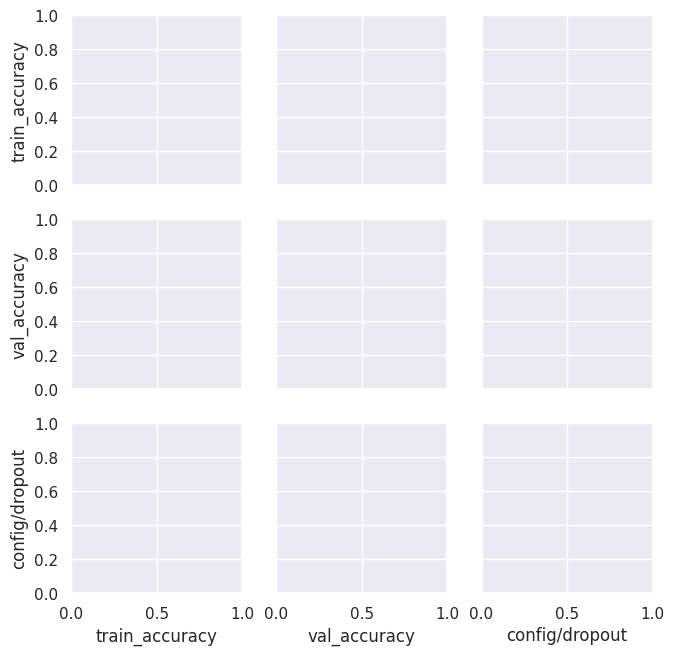

In [11]:
sns.pairplot(df_regularization, hue="config/coraa_filter_func")